*CNN MODEL*


#COVID-19 x ray dataset

1. IMPORTING THE LIBRARIES

In [ ]:
import os # reading the  files
#from tensorflow.keras.preprocessing import image


import numpy as np

import cv2
import tensorflow as tf


from tensorflow.keras.preprocessing.image import ImageDataGenerator # data augmentation

In [ ]:
import keras,os
from keras.preprocessing.image import ImageDataGenerator # keras preprocessor
import numpy as np

from keras.models import Sequential # sequential model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten # layers we will use in the sequential model
from keras import optimizers
from keras.optimizers import Adam # model optimizer

from keras.callbacks import ModelCheckpoint, EarlyStopping # callbacks

import matplotlib.pyplot as plt # drawing plots while training and testing

import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt

 2. EXPLORING THE DATASET

Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The data came presplit into test, training , and validation dataset
Location of the directories already loaded in google drive

In [ ]:
train_dir = '/content/drive/MyDrive/final_chest_x_ray/train'

valid_dir = '/content/drive/MyDrive/final_chest_x_ray/val'

test_dir = '/content/drive/MyDrive/final_chest_x_ray/test'

Reading the files within the test, train, and val folders

In [ ]:
train_normal = os.path.join(train_dir, 'normal')
train_covid = os.path.join(train_dir, 'covid')

valid_normal = os.path.join(valid_dir, 'normal')
valid_covid = os.path.join(valid_dir, "covid")

test_normal = os.path.join(test_dir, "normal")
test_covid = os.path.join(test_dir, 'covid')

In [ ]:
print('Total normal training x-ray images:', (len(os.listdir(train_normal)) + len(os.listdir(train_covid))))
print('Total validation x-ray images:', (len(os.listdir(valid_normal)) + len(os.listdir(valid_covid))))
print('Total testing x-ray images:', (len(os.listdir(test_normal)) + len(os.listdir(test_covid))))

Total normal training x-ray images: 1822
Total validation x-ray images: 298
Total testing x-ray images: 762


LOOKING AT THE NORMAL CHEST X RAY IMAGE

Text(0.5, 1.0, 'Normal Patient X RAY')

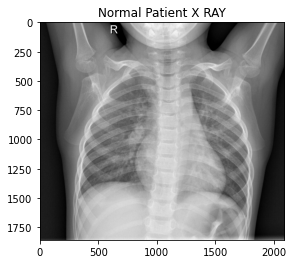

In [ ]:
normal_img =  cv2.imread('/content/drive/MyDrive/final_chest_x_ray/train/normal/IM-0115-0001.jpeg')
plt.imshow(normal_img)
plt.title('Normal Patient X RAY')

LOOKING AT THE COVID-19 CHEST X RAY IMAGES

Text(0.5, 1.0, 'COVID-19 Patient X RAY')

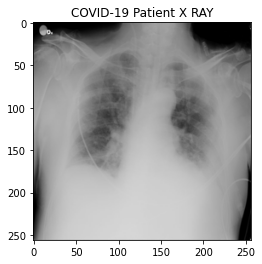

In [ ]:
covid_19_img =  cv2.imread('/content/drive/MyDrive/final_chest_x_ray/train/covid/COVID (1).png')
plt.imshow(covid_19_img)
plt.title('COVID-19 Patient X RAY')

x ray of covid-19 patient


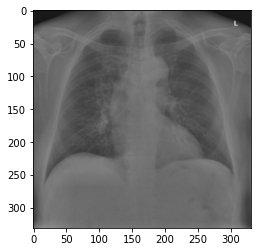

In [ ]:
covid_19_another_img = cv2.imread('/content/drive/MyDrive/final_chest_x_ray/train/covid/COVID (1001).png')
plt.imshow(covid_19_another_img)
print('x ray of covid-19 patient')

2. Data Augmentation 
https://keras.io/api/preprocessing/image/


The objective of ImageDataGenerator is to import data with labels easily into the model. It is a very useful class as it has many function to rescale, rotate, zoom, flip etc. The most useful thing about this class is that it doesn’t affect the data stored on the disk. 

As this one of the first data augmentation, I used the code mentioned in the keras documentaion and re-used it.

In [ ]:
train_data_generator= ImageDataGenerator(rescale=1./255,zoom_range=0.2,vertical_flip=True) # same as in keras documentataion 
train_generator=train_data_generator.flow_from_directory(directory=train_dir, 
                                         batch_size=100, #chose a size at random
                                         target_size =(255,255), # assumed a target size
                                         shuffle=True,
                                         class_mode = 'binary')

val_data_generator= ImageDataGenerator(rescale=1./255)
val_generator=val_data_generator.flow_from_directory(directory=valid_dir, 
                                         batch_size=100,
                                         target_size =(255,255),
                                         shuffle=True,
                                         class_mode = 'binary')

test_data_generator= ImageDataGenerator(rescale=1./255)
test_generator=test_data_generator.flow_from_directory(directory=test_dir, 
                                         batch_size=100,
                                         target_size =(255,255),
                                         shuffle=True,
                                         class_mode = 'binary')
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

Found 1820 images belonging to 2 classes.
Found 298 images belonging to 2 classes.
Found 762 images belonging to 2 classes.


In [ ]:


from keras.layers import Dense, Activation, Flatten, Dense,MaxPool2D, Dropout
from keras.layers import Conv2D, MaxPool2D, BatchNormalization #
from keras.callbacks import ModelCheckpoint, EarlyStopping # callbacks

CNN MODEL

In [ ]:
cnn_model_drop=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(255,255,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # First Convolution and Pooling Layers
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # Second Convolution and Pooling Layers
    tf.keras.layers.Dropout(0.2), # First dropout
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), # Third Convolution and Pooling Layers
    tf.keras.layers.Dropout(0.2), # Second dropout
    
    tf.keras.layers.Flatten(), # Flatten the Layers and Add Fully Connected Layers
    tf.keras.layers.Dropout(0.2), # Third dropout
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

# Compile the model using the adam optimizer, because it's essentially RMSProp with momentum. 
cnn_model_drop.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn_model_drop.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0

In [ ]:
model_name = "best_model.h5"
#CALLBACK - 1 - early_stop
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy' , patience = 5) 
'''EarlyStopping helps us to stop the training of the model early if there is no increase 
in the parameter which I have set to monitor in EarlyStopping. In this case I am monitoring validation 
accuracy by passing val_acc to EarlyStopping. I have here set patience to 5 which means that the model 
will stop to train if it doesn’t see any rise in validation accuracy in 5 epochs.'''
# if for 5 epochs the val_acc does not improve the training is going to be intereppupted
#patience is how long the model is going to train without interuppting

#CALLBACK - 2 - monitor
monitor = tf.keras.callbacks.ModelCheckpoint (model_name, monitor = 'val_accuracy',save_best_only = True , save_weights_only = True )
# you save the best model and the weights
#the callback is going the keep on checking the validation error and if the validation error decreases then we will save the model as the best model
# mode is whether u wabnt to save the minimum or maximum value of the cost function, we are not defining mode as it is automatically defined defined by tf
'''
ModelCheckpoint helps us to save the model by monitoring a specific parameter of the model. 
In this case I am monitoring validation accuracy by passing val_acc to ModelCheckpoint. 
The model will only be saved to disk if the validation accuracy of the model in current 
epoch is greater than what it was in the last epoch.
'''

#CALLBACK - 3 - lr_schedule
def scheduler(epoch, lr):
  if epoch%10==0:  #every 10 epoch reduce the learning rate by a factor of 2 
    lr = lr/2
  return lr
  
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)# definding the callback

In [ ]:
cnn_model_drop_hist = cnn_model_drop.fit(train_generator, 
                                        validation_data = val_generator, 
                                        epochs = 30, verbose = 1)

Epoch 1/30
19/19 [==============================] - 180s 9s/step - loss: 0.1109 - accuracy: 0.9626 - val_loss: 0.3038 - val_accuracy: 0.8826
Epoch 2/30
19/19 [==============================] - 189s 10s/step - loss: 0.1048 - accuracy: 0.9698 - val_loss: 0.4183 - val_accuracy: 0.7987
Epoch 3/30
19/19 [==============================] - 177s 9s/step - loss: 0.1164 - accuracy: 0.9571 - val_loss: 0.2091 - val_accuracy: 0.9060
Epoch 4/30
19/19 [==============================] - 177s 9s/step - loss: 0.0957 - accuracy: 0.9703 - val_loss: 0.3274 - val_accuracy: 0.8523
Epoch 5/30
19/19 [==============================] - 195s 10s/step - loss: 0.0694 - accuracy: 0.9764 - val_loss: 0.2321 - val_accuracy: 0.8926
Epoch 6/30
19/19 [==============================] - 179s 9s/step - loss: 0.0713 - accuracy: 0.9764 - val_loss: 0.2310 - val_accuracy: 0.8993
Epoch 7/30
19/19 [==============================] - 178s 9s/step - loss: 0.0701 - accuracy: 0.9769 - val_loss: 0.1726 - val_accuracy: 0.9228
Epoch 8/30


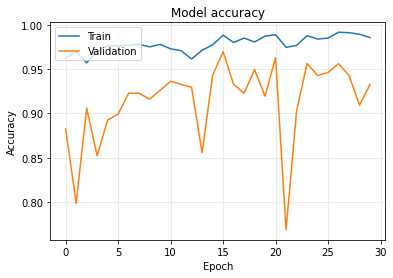

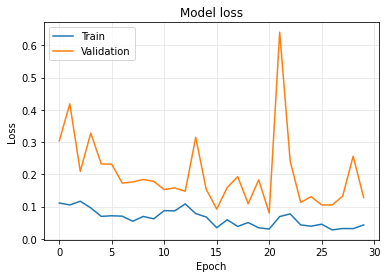

In [ ]:
plt.plot(cnn_model_drop_hist.history['accuracy'])
plt.plot(cnn_model_drop_hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(color='#e6e6e6')
plt.show()

plt.plot(cnn_model_drop_hist.history['loss'])
plt.plot(cnn_model_drop_hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(color='#e6e6e6')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
cnn_model_drop.evaluate(test_generator)

8/8 [==============================] - 20s 2s/step - loss: 0.0686 - accuracy: 0.9803


[0.06856206059455872, 0.9803149700164795]

Confusion Matrix

In [ ]:
y_pred = cnn_model_drop.predict_generator(test_generator)
y_true = test_generator.classes
y_pred = y_pred > 0.5

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

       covid       0.45      0.45      0.45       360
      normal       0.50      0.50      0.50       402

    accuracy                           0.48       762
   macro avg       0.47      0.47      0.47       762
weighted avg       0.48      0.48      0.48       762



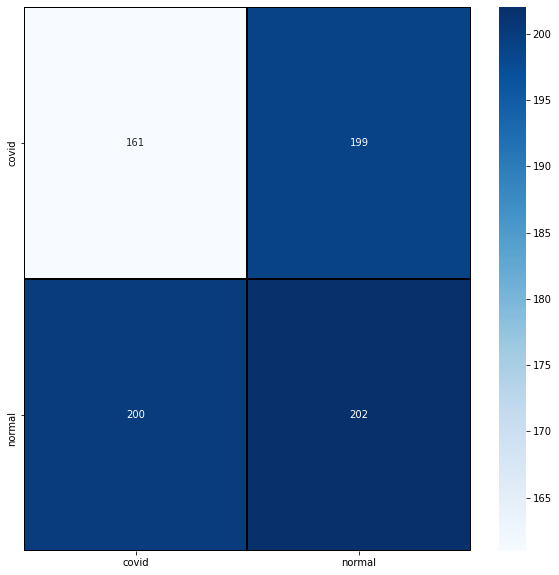

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns

# classification report
target_names = train_generator.class_indices

print(classification_report(y_true, y_pred, target_names=target_names))

# confusion matrix
mat = confusion_matrix(y_true, y_pred)
cm = pd.DataFrame(mat, index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , 
            annot = True, fmt='',xticklabels = target_names, yticklabels = target_names)